### Cleaning data and Prep

#### Import Packages and Files

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
%matplotlib inline
import matplotlib.pyplot as plt

usable_columns = ['TIME_STAMP', 'DATA_VALUE', 'CAPAB_NAME'] # these are the only columns we care about

df_leak = pd.read_csv(r'/Users/everett//BRI_ML_Project/MM10 Nozzle Leak.csv', usecols=usable_columns, skip_blank_lines=True)
df_good = pd.read_csv(r'/Users/everett/BRI_ML_Project/MM10 Good Run.csv', usecols=usable_columns, skip_blank_lines=True)
df_leak.head()

,TIME_STAMP,DATA_VALUE,CAPAB_NAME
0,09-28-22 11:43:46,39.776,Cycle Time
1,09-28-22 11:44:06,39.776,Cycle Time
2,09-28-22 11:44:26,39.776,Cycle Time
3,09-28-22 11:44:46,39.776,Cycle Time
4,09-28-22 11:45:06,39.776,Cycle Time


##### Define Transformer

In [2]:
from sklearn.base import BaseEstimator, TransformerMixin

# Defines transformer pipeline for leak data.
class LeakTransformer(BaseEstimator, TransformerMixin):
    def __init__(self) -> None:
        self
    def fit(self, X,y=None):
        return self
    def transform(self, X):
        X = X.drop(X[pd.isna(X["TIME_STAMP"])].index) # Eliminates NaN rows
        X = X.pivot(index="TIME_STAMP", columns="CAPAB_NAME", values="DATA_VALUE") 
        X = X.drop(columns=['Mold Close Position (Mold Protect)', 'Mold Load Detect Monitor Mode','Mold Load Detect Status',
        'Mold Open Limit Position', 'Mold Protect Monitor Status (By Time)', 'Mold Protect Monitor Time'], axis=1) # drops unusable columns
        X['Flag'] = 1 #this "Flag" column indicates that the data in the row is from the leak data set.
        return X

# Define transformer pipeline for good run data. Same as above except here we set Flag = 0.
class GoodTransformer(BaseEstimator, TransformerMixin):
    def __init__(self) -> None:
        self
    def fit(self, X,y=None):
        return self
    def transform(self, X):
        X = X.drop(X[pd.isna(X["TIME_STAMP"])].index)
        X = X.pivot(index="TIME_STAMP", columns="CAPAB_NAME", values="DATA_VALUE")
        X = X.drop(columns=['Mold Close Position (Mold Protect)', 'Mold Load Detect Monitor Mode','Mold Load Detect Status',
        'Mold Open Limit Position', 'Mold Protect Monitor Status (By Time)', 'Mold Protect Monitor Time'], axis=1)
        X['Flag'] = 0
        return X

In [3]:
# Apply transformer to leak data
leak_transformer = LeakTransformer()
df_leak_clean = leak_transformer.transform(df_leak)
df_leak_clean.head()

CAPAB_NAME,Barrel Temp Zone 1,Barrel Temp Zone 2,Barrel Temp Zone 3,Barrel Temp Zone 4,Barrel Temp Zone 5,Clamp Tonnage After Hold,Cooling Time,Cycle Time,Dose Time,Ejector Ejection Position,Ejector Ejection Speed,Filling Peak Pressure,Filling Time,Injection Speed,Min Cushion Position,Pack Pressure,Flag
TIME_STAMP,,,,,,,,,,,,,,,,,
09-28-22 11:43:46,281.66,399.92,399.92,399.92,399.56,-0.088998,20.0,39.776,7.312,2.599996,15.0,1143.474392,0.761,1.2,0.0,7863.406449,1
09-28-22 11:44:06,281.66,399.92,399.92,399.92,399.92,-0.088998,20.0,39.776,7.312,2.599996,15.0,1143.474392,0.761,1.2,0.0,7863.406449,1
09-28-22 11:44:26,281.66,399.92,399.92,399.92,399.92,-0.088998,20.0,39.776,7.312,2.599996,15.0,1143.474392,0.761,1.2,0.0,7863.406449,1
09-28-22 11:44:46,281.66,399.92,399.92,399.92,399.92,-0.088998,20.0,39.776,7.312,2.599996,15.0,1143.474392,0.761,1.2,0.0,7863.406449,1
09-28-22 11:45:06,281.84,399.92,399.92,399.92,399.74,-0.088998,20.0,39.776,7.312,2.599996,15.0,1143.474392,0.761,1.2,0.0,7863.406449,1


In [4]:
# Apply transformer to good run data
good_transformer = GoodTransformer()
df_good_clean = good_transformer.transform(df_good)
df_good_clean.head()

CAPAB_NAME,Barrel Temp Zone 1,Barrel Temp Zone 2,Barrel Temp Zone 3,Barrel Temp Zone 4,Barrel Temp Zone 5,Clamp Tonnage After Hold,Cooling Time,Cycle Time,Dose Time,Ejector Ejection Position,Ejector Ejection Speed,Filling Peak Pressure,Filling Time,Injection Speed,Min Cushion Position,Pack Pressure,Flag
TIME_STAMP,,,,,,,,,,,,,,,,,
10-05-22 0:00:04,500.18,500.18,509.9,519.80,510.62,78.010727,6.5,22.928,5.360,1.9,25.0,10579.58244,1.716,1.5,0.206846,10404.49128,0
10-05-22 0:00:24,500.00,500.00,509.9,519.98,510.26,77.954094,6.5,22.928,5.360,1.9,25.0,10579.58244,1.716,1.5,0.206846,10585.77663,0
10-05-22 0:00:44,500.00,500.00,509.9,519.98,510.26,77.954094,6.5,22.928,5.360,1.9,25.0,10579.58244,1.716,1.5,0.206846,10585.77663,0
10-05-22 0:01:04,500.00,500.00,509.9,519.98,510.26,77.954094,6.5,22.968,5.408,1.9,25.0,10495.91004,1.716,1.5,0.203000,10585.77663,0
10-05-22 0:01:24,499.64,499.82,509.9,520.16,509.54,77.994555,6.5,22.968,5.408,1.9,25.0,10495.91004,1.716,1.5,0.203000,10406.04345,0


##### Combine Datasets

In [5]:
df_combined = pd.concat([df_leak_clean, df_good_clean], axis=0)
df_combined

CAPAB_NAME,Barrel Temp Zone 1,Barrel Temp Zone 2,Barrel Temp Zone 3,Barrel Temp Zone 4,Barrel Temp Zone 5,Clamp Tonnage After Hold,Cooling Time,Cycle Time,Dose Time,Ejector Ejection Position,Ejector Ejection Speed,Filling Peak Pressure,Filling Time,Injection Speed,Min Cushion Position,Pack Pressure,Flag
TIME_STAMP,,,,,,,,,,,,,,,,,
09-28-22 11:43:46,281.66,399.92,399.92,399.92,399.56,-0.088998,20.0,39.776,7.312,2.599996,15.0,1143.474392,0.761,1.2,0.000000,7863.406449,1
09-28-22 11:44:06,281.66,399.92,399.92,399.92,399.92,-0.088998,20.0,39.776,7.312,2.599996,15.0,1143.474392,0.761,1.2,0.000000,7863.406449,1
09-28-22 11:44:26,281.66,399.92,399.92,399.92,399.92,-0.088998,20.0,39.776,7.312,2.599996,15.0,1143.474392,0.761,1.2,0.000000,7863.406449,1
09-28-22 11:44:46,281.66,399.92,399.92,399.92,399.92,-0.088998,20.0,39.776,7.312,2.599996,15.0,1143.474392,0.761,1.2,0.000000,7863.406449,1
09-28-22 11:45:06,281.84,399.92,399.92,399.92,399.74,-0.088998,20.0,39.776,7.312,2.599996,15.0,1143.474392,0.761,1.2,0.000000,7863.406449,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10-07-22 9:58:29,499.46,499.82,509.72,519.98,509.72,76.522035,6.5,22.968,5.464,1.900000,25.0,9817.246837,1.715,1.5,0.193772,9820.351187,0
10-07-22 9:58:49,500.18,499.82,509.72,519.98,509.72,76.433038,6.5,22.968,5.464,1.900000,25.0,9823.455537,1.714,1.5,0.194157,9823.455537,0
10-07-22 9:59:09,500.18,499.82,509.90,519.98,510.08,76.433038,6.5,22.968,5.464,1.900000,25.0,9823.455537,1.714,1.5,0.194157,9823.455537,0


### Initial Exploratory Analysis

##### Collinearity Analysis

In [6]:
corr_matrix = df_combined.corr()
corr_matrix

CAPAB_NAME,Barrel Temp Zone 1,Barrel Temp Zone 2,Barrel Temp Zone 3,Barrel Temp Zone 4,Barrel Temp Zone 5,Clamp Tonnage After Hold,Cooling Time,Cycle Time,Dose Time,Ejector Ejection Position,Ejector Ejection Speed,Filling Peak Pressure,Filling Time,Injection Speed,Min Cushion Position,Pack Pressure,Flag
CAPAB_NAME,,,,,,,,,,,,,,,,,
Barrel Temp Zone 1,1.000000,0.966405,0.848297,0.746144,0.811655,0.411588,-0.634696,0.001514,-0.291434,-0.635346,0.417107,-0.324953,0.748327,0.425245,0.282982,0.110949,-0.202517
Barrel Temp Zone 2,0.966405,1.000000,0.917343,0.823006,0.743999,0.297996,-0.626663,0.009776,-0.183883,-0.612985,0.308866,-0.331514,0.647224,0.321884,0.190142,0.031852,-0.159590
Barrel Temp Zone 3,0.848297,0.917343,1.000000,0.978299,0.435851,0.383802,-0.810991,0.011406,-0.241112,-0.788064,0.390784,-0.020541,0.446439,0.410732,0.278950,0.127948,-0.114472
Barrel Temp Zone 4,0.746144,0.823006,0.978299,1.000000,0.256436,0.427799,-0.852751,0.009473,-0.277906,-0.833330,0.434028,0.156937,0.325577,0.453551,0.326655,0.186332,-0.089287
Barrel Temp Zone 5,0.811655,0.743999,0.435851,0.256436,1.000000,0.052825,-0.169734,0.007155,-0.021620,-0.167388,0.052171,-0.715085,0.734212,0.058555,-0.022867,-0.118709,-0.176815
Clamp Tonnage After Hold,0.411588,0.297996,0.383802,0.427799,0.052825,1.000000,-0.531809,-0.069420,-0.772947,-0.561954,0.917483,0.511282,0.505113,0.852442,0.781745,0.561967,-0.157995
Cooling Time,-0.634696,-0.626663,-0.810991,-0.852751,-0.169734,-0.531809,1.000000,-0.000492,0.382415,0.946357,-0.544382,-0.275783,-0.315965,-0.572297,-0.423710,-0.271599,0.103054
Cycle Time,0.001514,0.009776,0.011406,0.009473,0.007155,-0.069420,-0.000492,1.000000,0.142392,-0.000520,-0.070785,-0.021377,-0.002180,-0.061718,-0.055429,-0.035773,0.013476
Dose Time,-0.291434,-0.183883,-0.241112,-0.277906,-0.021620,-0.772947,0.382415,0.142392,1.000000,0.404091,-0.844002,-0.412650,-0.370026,-0.801267,-0.729297,-0.463836,0.288644


Found out later that correlation analysis isn't super important for predictive modeling... But still helpful to see what variables are contributing the most


In [7]:
corr_matrix['Flag'].sort_values(key=abs,ascending=False)

CAPAB_NAME
Flag                         1.000000
Min Cushion Position        -0.412178
Filling Time                -0.378035
Pack Pressure               -0.302368
Dose Time                    0.288644
Barrel Temp Zone 1          -0.202517
Ejector Ejection Speed      -0.189305
Injection Speed             -0.189293
Barrel Temp Zone 5          -0.176815
Barrel Temp Zone 2          -0.159590
Clamp Tonnage After Hold    -0.157995
Barrel Temp Zone 3          -0.114472
Ejector Ejection Position    0.108896
Cooling Time                 0.103054
Barrel Temp Zone 4          -0.089287
Filling Peak Pressure        0.036589
Cycle Time                   0.013476
Name: Flag, dtype: float64

array([[<AxesSubplot:xlabel='Flag', ylabel='Flag'>,
        <AxesSubplot:xlabel='Min Cushion Position', ylabel='Flag'>,
        <AxesSubplot:xlabel='Filling Time', ylabel='Flag'>,
        <AxesSubplot:xlabel='Pack Pressure', ylabel='Flag'>],
       [<AxesSubplot:xlabel='Flag', ylabel='Min Cushion Position'>,
        <AxesSubplot:xlabel='Min Cushion Position', ylabel='Min Cushion Position'>,
        <AxesSubplot:xlabel='Filling Time', ylabel='Min Cushion Position'>,
        <AxesSubplot:xlabel='Pack Pressure', ylabel='Min Cushion Position'>],
       [<AxesSubplot:xlabel='Flag', ylabel='Filling Time'>,
        <AxesSubplot:xlabel='Min Cushion Position', ylabel='Filling Time'>,
        <AxesSubplot:xlabel='Filling Time', ylabel='Filling Time'>,
        <AxesSubplot:xlabel='Pack Pressure', ylabel='Filling Time'>],
       [<AxesSubplot:xlabel='Flag', ylabel='Pack Pressure'>,
        <AxesSubplot:xlabel='Min Cushion Position', ylabel='Pack Pressure'>,
        <AxesSubplot:xlabel='Filling Tim

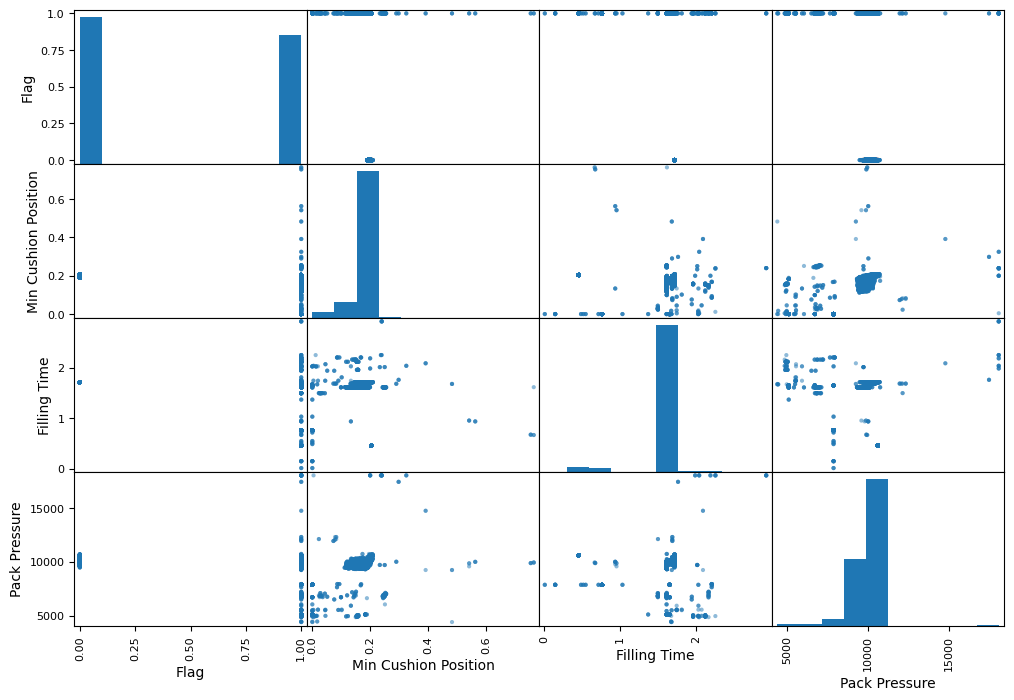

In [8]:
from pandas.plotting import scatter_matrix

attributes = ["Flag", "Min Cushion Position", "Filling Time", "Pack Pressure"]

scatter_matrix(df_combined[attributes], figsize = (12,8))

In [9]:
df_combined['Flag'].value_counts()

0    10547
1     9226
Name: Flag, dtype: int64

#### VIF Analysis

More correlation analysis... not too applicable for ML

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

set1 = df_combined.drop(['Flag'], axis=1)

In [11]:
vif_data = pd.DataFrame()
vif_data["column"] = set1.columns
vif_data["VIF Value"] = [variance_inflation_factor(set1.values, i)
    for i in range(len(set1.columns))]
vif_data

,column,VIF Value
0,Barrel Temp Zone 1,28039.394766
1,Barrel Temp Zone 2,202978.275563
2,Barrel Temp Zone 3,554409.731665
3,Barrel Temp Zone 4,370606.499816
4,Barrel Temp Zone 5,3481.499159
5,Clamp Tonnage After Hold,386.516420
6,Cooling Time,383.314030
7,Cycle Time,1.046524
8,Dose Time,630.904390
9,Ejector Ejection Position,7735.130043


In [12]:
temperature_columns = df_combined.filter(['Barrel Temp Zone 1', 'Barrel Temp Zone 2', 'Barrel Temp Zone 3',
 'Barrel Temp Zone 4', 'Barrel Temp Zone 5'])
temperature_columns.corr()

CAPAB_NAME,Barrel Temp Zone 1,Barrel Temp Zone 2,Barrel Temp Zone 3,Barrel Temp Zone 4,Barrel Temp Zone 5
CAPAB_NAME,,,,,
Barrel Temp Zone 1,1.000000,0.966405,0.848297,0.746144,0.811655
Barrel Temp Zone 2,0.966405,1.000000,0.917343,0.823006,0.743999
Barrel Temp Zone 3,0.848297,0.917343,1.000000,0.978299,0.435851
Barrel Temp Zone 4,0.746144,0.823006,0.978299,1.000000,0.256436
Barrel Temp Zone 5,0.811655,0.743999,0.435851,0.256436,1.000000


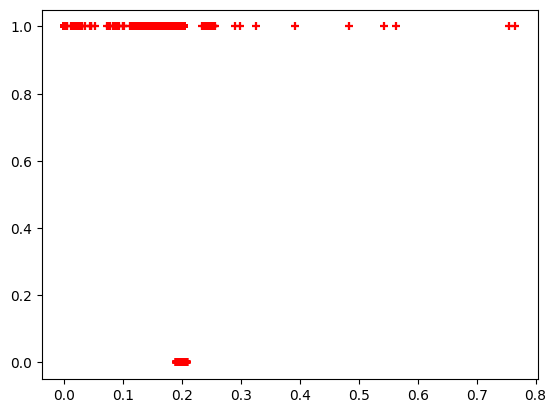

In [13]:
plt.scatter(df_combined['Min Cushion Position'], df_combined['Flag'], marker='+', color='red')

Interesting that there seems to be a certain range around 0.2 where the cushion position is centered around during a good run. When a leak occurs, the value can really be anywhere.

(array([6.430e+02, 6.000e+00, 9.000e+00, 1.100e+01, 9.000e+00, 9.000e+00,
        3.000e+00, 0.000e+00, 0.000e+00, 6.000e+00, 6.000e+00, 9.000e+00,
        9.000e+00, 3.000e+00, 3.000e+00, 1.370e+02, 2.530e+02, 8.120e+02,
        3.200e+02, 2.420e+02, 2.280e+02, 3.390e+02, 4.560e+02, 9.600e+02,
        3.136e+03, 8.281e+03, 3.733e+03, 5.900e+01, 0.000e+00, 0.000e+00,
        6.000e+00, 2.000e+01, 2.900e+01, 9.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 3.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00,
        0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

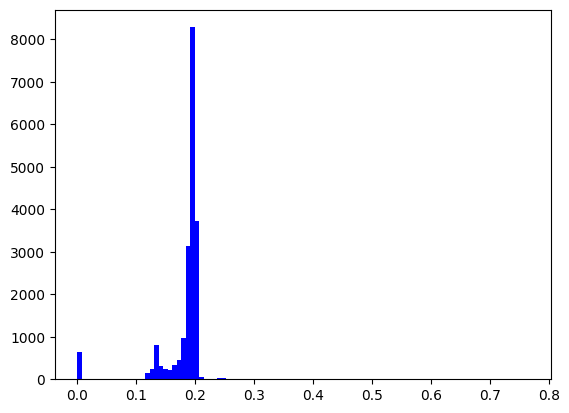

In [14]:
plt.hist(df_combined['Min Cushion Position'], color='blue', bins=100)

(array([3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 9.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        5.8600e+02, 3.0000e+00, 3.0000e+00, 3.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 5.0000e+00, 0.0000e+00, 3.0000e+00,
        5.0200e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 6.0000e+00, 3.0000e+00, 0.0000e+00, 0.0000e+00,
        3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.6000e+01, 0.0000e+00, 0.0000e+00, 2.7000e+01,
        5.5470e+03, 1.2800e+02, 1.5370e+03, 1.1223e+04, 1.1000e+01,
        3.0000e+00, 3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.4000e+01, 3.0000e+00, 6.0000e+00, 2.0000e+01,
        3.0000e+00, 3.0000e+00, 2.9000e+01, 1.80

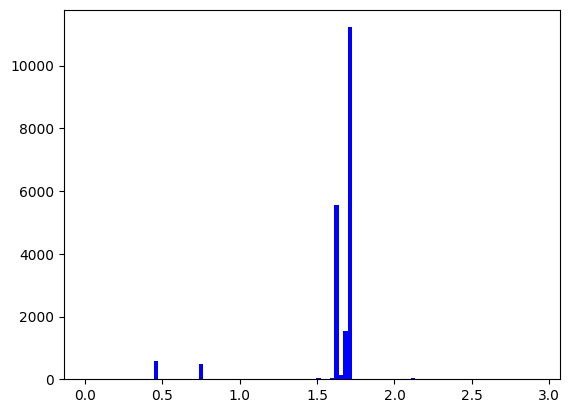

In [15]:
plt.hist(df_combined['Filling Time'], color='blue', bins=100)

### Split Training and Test Sets

In [16]:
Y_set = df_combined['Flag']
Y_set

TIME_STAMP
09-28-22 11:43:46    1
09-28-22 11:44:06    1
09-28-22 11:44:26    1
09-28-22 11:44:46    1
09-28-22 11:45:06    1
                    ..
10-07-22 9:58:29     0
10-07-22 9:58:49     0
10-07-22 9:59:09     0
10-07-22 9:59:29     0
10-07-22 9:59:49     0
Name: Flag, Length: 19773, dtype: int64

In [17]:
X_set = df_combined.drop(['Flag'], axis=1)
X_set

CAPAB_NAME,Barrel Temp Zone 1,Barrel Temp Zone 2,Barrel Temp Zone 3,Barrel Temp Zone 4,Barrel Temp Zone 5,Clamp Tonnage After Hold,Cooling Time,Cycle Time,Dose Time,Ejector Ejection Position,Ejector Ejection Speed,Filling Peak Pressure,Filling Time,Injection Speed,Min Cushion Position,Pack Pressure
TIME_STAMP,,,,,,,,,,,,,,,,
09-28-22 11:43:46,281.66,399.92,399.92,399.92,399.56,-0.088998,20.0,39.776,7.312,2.599996,15.0,1143.474392,0.761,1.2,0.000000,7863.406449
09-28-22 11:44:06,281.66,399.92,399.92,399.92,399.92,-0.088998,20.0,39.776,7.312,2.599996,15.0,1143.474392,0.761,1.2,0.000000,7863.406449
09-28-22 11:44:26,281.66,399.92,399.92,399.92,399.92,-0.088998,20.0,39.776,7.312,2.599996,15.0,1143.474392,0.761,1.2,0.000000,7863.406449
09-28-22 11:44:46,281.66,399.92,399.92,399.92,399.92,-0.088998,20.0,39.776,7.312,2.599996,15.0,1143.474392,0.761,1.2,0.000000,7863.406449
09-28-22 11:45:06,281.84,399.92,399.92,399.92,399.74,-0.088998,20.0,39.776,7.312,2.599996,15.0,1143.474392,0.761,1.2,0.000000,7863.406449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10-07-22 9:58:29,499.46,499.82,509.72,519.98,509.72,76.522035,6.5,22.968,5.464,1.900000,25.0,9817.246837,1.715,1.5,0.193772,9820.351187
10-07-22 9:58:49,500.18,499.82,509.72,519.98,509.72,76.433038,6.5,22.968,5.464,1.900000,25.0,9823.455537,1.714,1.5,0.194157,9823.455537
10-07-22 9:59:09,500.18,499.82,509.90,519.98,510.08,76.433038,6.5,22.968,5.464,1.900000,25.0,9823.455537,1.714,1.5,0.194157,9823.455537


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_set,Y_set, test_size=0.2, stratify=Y_set,random_state=42)

#### Check Stratified Proportions

In [19]:
real_proportion = df_combined['Flag'].value_counts() / df_combined['Flag'].size
real_proportion

0    0.533404
1    0.466596
Name: Flag, dtype: float64

In [20]:
train_proportion = y_train.value_counts() / y_train.size
train_proportion

0    0.53338
1    0.46662
Name: Flag, dtype: float64

In [21]:
test_proportion = y_test.value_counts() / y_test.size
test_proportion

0    0.533502
1    0.466498
Name: Flag, dtype: float64

Proportions in all test and training sets are equal - the stratified splitter did its job!

### Classification Models

#### Simple Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(max_iter=1000)

In [34]:
model1.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [35]:
y_predicted = model1.predict(X_test)

In [36]:
model1.score(X_test, y_test)

0.870290771175727

##### Confusion Matrix for Logistic Regression

In [37]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predicted)

array([[1952,  158],
       [ 355, 1490]])

In [49]:
# Checking proportions

import numpy

total = (1952 + 158 + 355 + 1490)
T_Neg = 1952 / total
T_Pos = 1490 / total
F_Neg = 355 / total
F_Pos = 158 / total

A = numpy.array([T_Neg, T_Pos, F_Neg, F_Pos])
A

array([0.49355247, 0.37673831, 0.0897598 , 0.03994943])

##### Precision and Recall for Logistic Regression

In [39]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, y_predicted)

0.904126213592233

In [41]:
recall_score(y_test, y_predicted)

0.8075880758807588

##### Cross Validation for Simple Logistic Regression

In [47]:
from sklearn.model_selection import cross_val_score
LR_score = cross_val_score(model1, X_train, y_train, cv=10)
tree_rmse_scores_LR = np.sqrt(LR_score)

In [48]:
def display_scores(LR_score):
    print("Score:", LR_score)
    print("Mean:", LR_score.mean())
    print("Standard deviation:", LR_score.std())
display_scores(tree_rmse_scores_LR)

Score: [0.93228374 0.91067555 0.94105678 0.89315419 0.9113694  0.9336388
 0.92102839 0.90859083 0.91546555 0.93223935]
Mean: 0.9199502581754949
Standard deviation: 0.014014244725350183


#### SGD Classifier

In [62]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [63]:
y_predicted_sgd = sgd_clf.predict(X_test)
sgd_clf.score(X_test, y_test)

0.7352718078381795

##### Confusion Matrix for SGD Classifier

In [53]:
confusion_matrix(y_test, y_predicted_sgd)

array([[1583,  527],
       [ 520, 1325]])

##### Precision and Recall for SGD Classifier

In [54]:
precision_score(y_test, y_predicted_sgd)

0.7154427645788337

In [55]:
recall_score(y_test, y_predicted_sgd)

0.7181571815718157

##### Cross Validation for SGD Classifier

In [60]:
SGD_score = cross_val_score(sgd_clf, X_train, y_train, cv=10)
tree_rmse_scores_SGD = np.sqrt(SGD_score)

In [61]:
def display_SGD_scores(SGD_score):
    print("Score:", SGD_score)
    print("Mean:", SGD_score.mean())
    print("Standard deviation:", SGD_score.std())
display_scores(tree_rmse_scores_SGD)

Score: [0.86255141 0.85519163 0.847022   0.78706355 0.88676175 0.85222992
 0.76631022 0.78344114 0.77271628 0.79808436]
Mean: 0.8211372255197091
Standard deviation: 0.041571896134176584


##### SGD Precision Recall Tradeoff and ROC

In [73]:
from sklearn.model_selection import cross_val_predict
sgd_scores = cross_val_predict(sgd_clf, X_train, y_train, cv=10, method="decision_function")


In [74]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, sgd_scores)


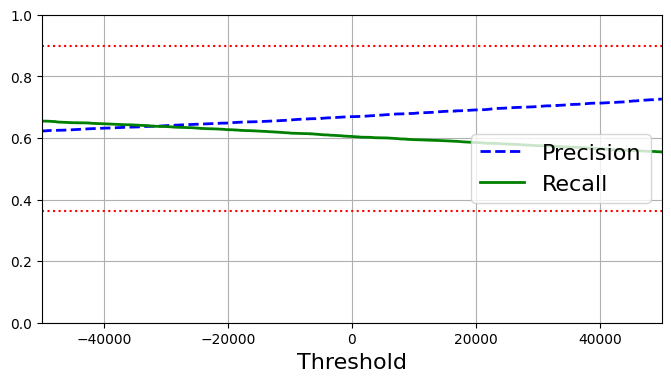

In [75]:

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)        
    plt.grid(True)                              
    plt.axis([-50000, 50000, 0, 1])             



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                 
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")                                             
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                            
plt.show()


In [77]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, sgd_scores)

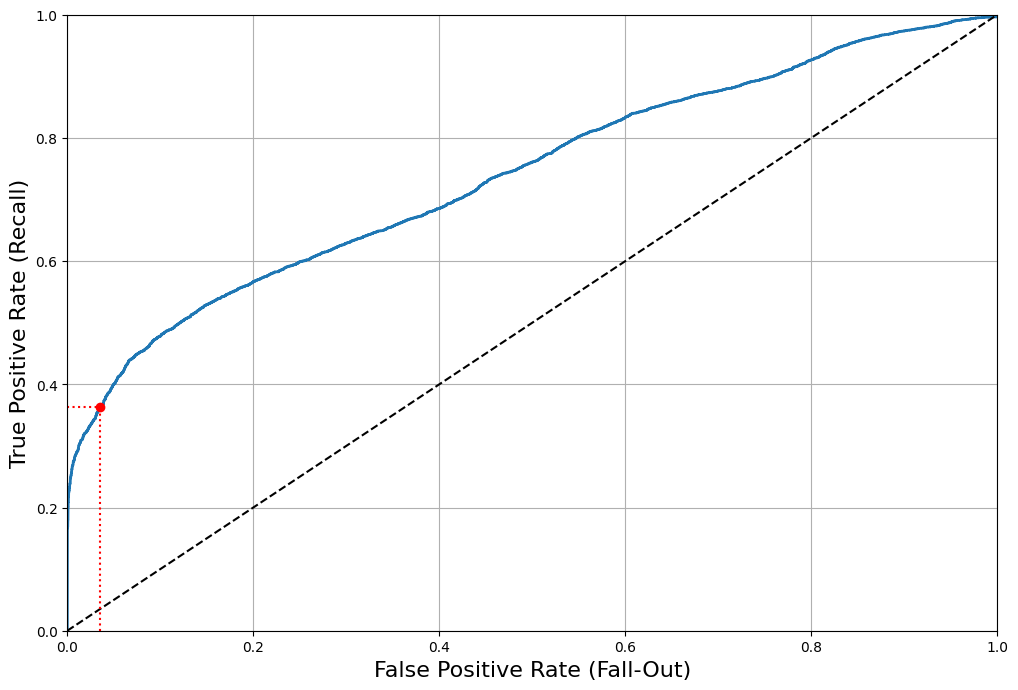

In [78]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                           

plt.figure(figsize=(12, 8))                                    
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]          
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")  
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  
plt.plot([fpr_90], [recall_90_precision], "ro")               
plt.show()


Compare the SGD Classifier and Logistic Regression

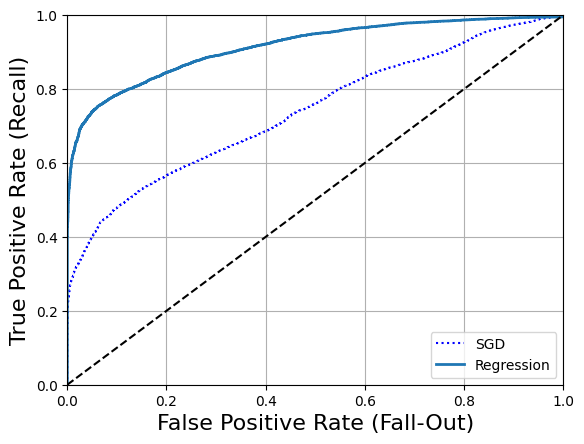

In [79]:
y_probas_regression = cross_val_predict(model1, X_train, y_train, cv=10, method="predict_proba")
y_scores_regression = y_probas_regression[:, 1]
fpr_regression, tpr_regression, thresholds_forest = roc_curve(y_train, y_scores_regression)
plt.plot(fpr, tpr, "b:", label ="SGD")
plot_roc_curve(fpr_regression, tpr_regression, "Regression")
plt.legend(loc="lower right")
plt.show()

Logistic Regression is clearly superior with greater AUC

#### Linear Support Vector Machine (Soft Margins)

In [83]:
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

scaler = StandardScaler()

In [92]:
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1,max_iter=10000,dual=False)),
    ])
svm_clf.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, dual=False, max_iter=10000))])

In [93]:
y_predicted_svm = svm_clf.predict(X_test)
svm_clf.score(X_test, y_test)

0.9719342604298357

##### Confusion Matrix for Linear SVM

In [94]:
confusion_matrix(y_test, y_predicted_svm)

array([[2109,    1],
       [ 110, 1735]])

##### Precision and Recall for Linear SVM

In [95]:
precision_score(y_test, y_predicted_svm)

0.9994239631336406

In [96]:
recall_score(y_test, y_predicted_svm)

0.940379403794038

##### Cross Validation for Linear SVM

In [97]:
SVM_score = cross_val_score(svm_clf, X_train, y_train, cv=10)
tree_rmse_scores_SVM = np.sqrt(SVM_score)

In [98]:
def display_SVM_scores(SVM_score):
    print("Score:", SVM_score)
    print("Mean:", SVM_score.mean())
    print("Standard deviation:", SVM_score.std())
display_scores(tree_rmse_scores_SVM)

Score: [0.98374912 0.98791689 0.98246317 0.9814976  0.98599549 0.98567489
 0.98567489 0.98855652 0.9879092  0.98886911]
Mean: 0.9858306876627394
Standard deviation: 0.0024466099678813026


#### Polynomial Kernel SVM

In [100]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1,C=5))
])

poly_kernel_svm_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [101]:
y_predicted_svm_poly = poly_kernel_svm_clf.predict(X_test)
poly_kernel_svm_clf.score(X_test, y_test)

0.9951959544879899

##### Confusion Matrix for Polynomial Kernel SVM

In [102]:
confusion_matrix(y_test, y_predicted_svm_poly)

array([[2109,    1],
       [  18, 1827]])

##### Precision and Recall for Polynomial Kernel SVM

In [103]:
precision_score(y_test, y_predicted_svm_poly)

0.99945295404814

In [104]:
recall_score(y_test, y_predicted_svm_poly)

0.9902439024390244

##### Cross Validation for Polynomial Kernel SVM

In [105]:
SVM_poly_score = cross_val_score(poly_kernel_svm_clf, X_train, y_train, cv=10)
tree_rmse_scores_SVM_poly = np.sqrt(SVM_poly_score)

In [106]:
def display_SVM_poly_scores(SVM_poly_score):
    print("Score:", SVM_poly_score)
    print("Mean:", SVM_poly_score.mean())
    print("Standard deviation:", SVM_poly_score.std())
display_scores(tree_rmse_scores_SVM_poly)

Score: [0.99841847 0.99810186 0.99810186 0.99873498 0.99746835 0.99873498
 0.99715144 0.99683443 0.99810066 0.99841747]
Mean: 0.9980064514650966
Standard deviation: 0.0006181828130041399


#### Decision Tree 

In [109]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [111]:
y_predicted_tree = tree_clf.predict(X_test)
tree_clf.score(X_test, y_test)

0.9762326169405815

##### Confusion Matrix for Decision Tree

In [112]:
confusion_matrix(y_test, y_predicted_tree)

array([[2105,    5],
       [  89, 1756]])

##### Precision and Recall for Decision Tree

In [113]:
precision_score(y_test, y_predicted_tree)

0.997160704145372

In [114]:
recall_score(y_test, y_predicted_tree)

0.9517615176151761

##### Cross Validation for Decision Tree

In [115]:
decision_tree_score = cross_val_score(tree_clf, X_train, y_train, cv=10)
tree_rmse_scores_decision_tree = np.sqrt(decision_tree_score)

In [116]:
def display_DTree_scores(decision_tree_score):
    print("Score:", decision_tree_score)
    print("Mean:", decision_tree_score.mean())
    print("Standard deviation:", decision_tree_score.std())
display_scores(tree_rmse_scores_decision_tree)

Score: [0.98887618 0.98887618 0.98855652 0.98695665 0.98631598 0.98919574
 0.98471248 0.99047295 0.99014754 0.99174327]
Mean: 0.9885853504250204
Standard deviation: 0.001982935787195823


#### Random Forest

In [117]:
from sklearn.ensemble import RandomForestClassifier

In [119]:
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [120]:
y_predicted_rnd = rnd_clf.predict(X_test)
rnd_clf.score(X_test, y_test)

1.0

##### Confusion Matrix for Random Forest

In [121]:
confusion_matrix(y_test, y_predicted_rnd)

array([[2110,    0],
       [   0, 1845]])

##### Cross_Validadtion on Random Foreset

In [122]:
rnd_forest_score = cross_val_score(rnd_clf, X_train, y_train, cv=10)
tree_rmse_scores_rnd = np.sqrt(rnd_forest_score)

In [123]:
def display_rnd_scores(rnd_forest_score):
    print("Score:", rnd_forest_score)
    print("Mean:", rnd_forest_score.mean())
    print("Standard deviation:", rnd_forest_score.std())
display_scores(tree_rmse_scores_rnd)

Score: [1.         1.         1.         1.         1.         1.
 0.99905138 1.         1.         1.        ]
Mean: 0.99990513831857
Standard deviation: 0.0002845850442901754


##### ROC For Random Forest

In [124]:
y_probas_rnd = cross_val_predict(rnd_clf, X_train, y_train, cv=10, method="predict_proba")
scores_rnd = y_probas_rnd[:, 1] 
fpr_rnd, tpr_rnd, thresholds_forest = roc_curve(y_train, scores_rnd)

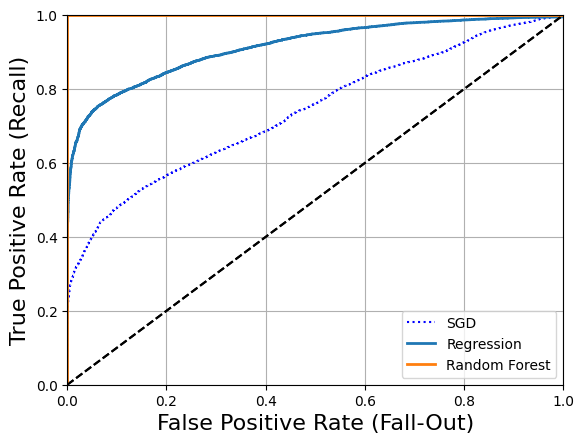

In [125]:
plt.plot(fpr, tpr, "b:", label ="SGD")
plot_roc_curve(fpr_regression, tpr_regression, "Regression")
plot_roc_curve(fpr_rnd, tpr_rnd, "Random Forest")
plt.legend(loc="lower right")
plt.show()

Clearly the Random Forest Outperforms the other algorithms

#### Voting Classifier

In [129]:
from sklearn.ensemble import VotingClassifier
log_clf = LogisticRegression(max_iter=10000)

In [130]:
voting_clf = VotingClassifier(
    estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf), ('psvc', poly_kernel_svm_clf), ('sgd', sgd_clf), ('dt', tree_clf)],
    voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=10000)),
                             ('rf',
                              RandomForestClassifier(n_estimators=500,
                                                     random_state=42)),
                             ('svc',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('linear_svc',
                                               LinearSVC(C=1, dual=False,
                                                         max_iter=10000))])),
                             ('psvc',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('svm_clf',
                                               SVC(C=5, coef0=1,
                                                   kernel='poly'))])),
                             ('sgd', SGDClassifier(random_state=42)),
                             ('dt', DecisionTreeClassifier(max_depth=2))])

In [131]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, poly_kernel_svm_clf, sgd_clf, tree_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.870290771175727
RandomForestClassifier 1.0
Pipeline 0.9719342604298357
Pipeline 0.9951959544879899
SGDClassifier 0.7352718078381795
DecisionTreeClassifier 0.9762326169405815
VotingClassifier 0.9716814159292035


Looks like the Voting Classifier isn't as good as Random Forest

### Tuning Hyperparameters for Random Forest Tree

In [132]:
print(rnd_clf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [133]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [141]:
adj_rnd_clf = RandomForestClassifier(random_state=42, max_features = 'sqrt')
rf_random_search = RandomizedSearchCV( adj_rnd_clf, random_grid, n_iter = 10, cv=5, scoring='neg_mean_squared_error',return_train_score=True, random_state=42)
# Fit the random search model
rf_random_search.fit(X_train, y_train)
import warnings
warnings.filterwarnings("ignore")

/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

In [142]:
rf_random_search.best_estimator_

RandomForestClassifier(max_depth=30, min_samples_split=5, n_estimators=1400,
                       random_state=42)

In [143]:
feature_importances = rf_random_search.best_estimator_.feature_importances_
feature_importances

array([0.0037876 , 0.00269842, 0.00140609, 0.00268266, 0.00631463,
       0.12282372, 0.        , 0.04689957, 0.14054949, 0.        ,
       0.00072704, 0.03482117, 0.35990533, 0.00044495, 0.22790715,
       0.0490322 ])

In [145]:
for name, score in sorted(zip(rf_random_search.best_estimator_.feature_importances_, X_train,), reverse=True):
    print(name, score)

0.3599053295688058 Filling Time
0.22790715170543835 Min Cushion Position
0.14054948517968877 Dose Time
0.12282371532849085 Clamp Tonnage After Hold
0.049032197632981285 Pack Pressure
0.046899566771462696 Cycle Time
0.03482116570219136 Filling Peak Pressure
0.0063146301422194115 Barrel Temp Zone 5
0.003787598923836004 Barrel Temp Zone 1
0.0026984190672428537 Barrel Temp Zone 2
0.002682656574959897 Barrel Temp Zone 4
0.001406091016687946 Barrel Temp Zone 3
0.0007270422708277988 Ejector Ejection Speed
0.00044495011516694315 Injection Speed
0.0 Ejector Ejection Position
0.0 Cooling Time


In [147]:
final_model = rf_random_search.best_estimator_

final_predictions = final_model.predict(X_test)

In [148]:
confusion_matrix(y_test, final_predictions)

array([[2110,    0],
       [   0, 1845]])

Seems like it works :)